For each dataset, Identify the a. type (eg: Linear/NonLinear; Single/Multilabel) and b.
tasks possible on the dataset (Classification/Regression) and justify your answer with
the following evidences
a. Inspect and report based on the type of variables based on your basic domain
knowledge/context
b. Any one exploratory analysis technique
c. Any one Inferential analysis technique
d. Any one predicative analysis technique

## Dataset 1: data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
df1 = pd.read_csv("data.csv")
df1

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [3]:
df1.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [4]:
missing_values = df1.isnull().sum()
missing_values

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [5]:
num_duplicates = df1.duplicated().sum()
num_duplicates

0

In [6]:
df1.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [7]:
df1 = df1.drop('filename', axis=1, errors='ignore')#drop useless Columns
df1.dtypes

tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [8]:
df1

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


### 1.a. Inspection of Variables
Dataset1 (`df1`) consists of both numerical and categorical variables:

- **Numerical Variables:**
  - `tempo`, `beats`, `chroma_stft`, `rmse`, `spectral_centroid`, `spectral_bandwidth`, `rolloff`, `zero_crossing_rate`, `mfcc1` through `mfcc20`.

- **Categorical Variable:**
  - `filename` and `label`.

Given the presence of the `label` column, it seems suitable for a single-label classification task.

### 1.b. Exploratory Analysis

In [9]:
label_counts = df1['label'].value_counts()
label_counts

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

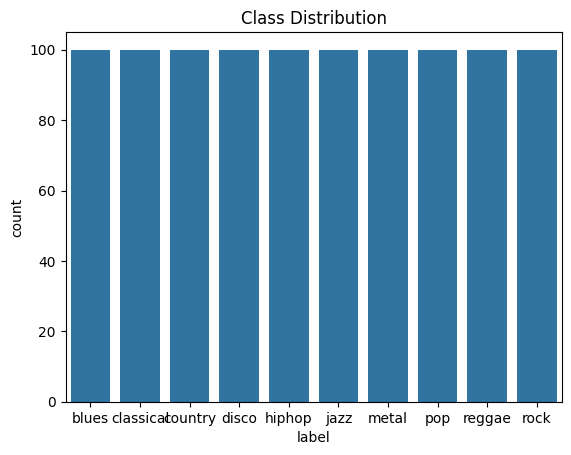

In [10]:
# Visualization of Class Distribution
sns.countplot(x='label', data=df1)
plt.title('Class Distribution')
plt.show()

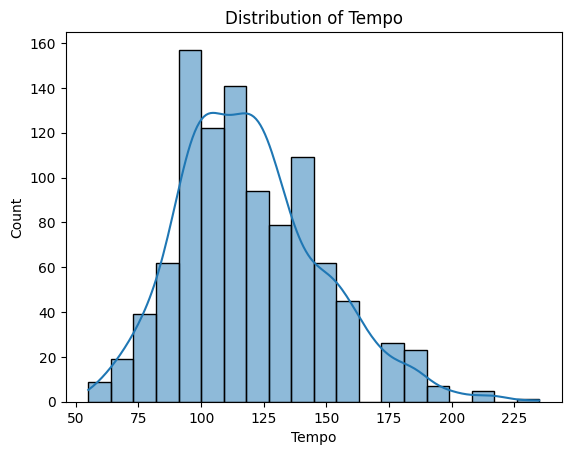

In [11]:
# Distribution of a Numerical Feature (e.g., 'tempo')
sns.histplot(df1['tempo'], bins=20, kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo')
plt.show()

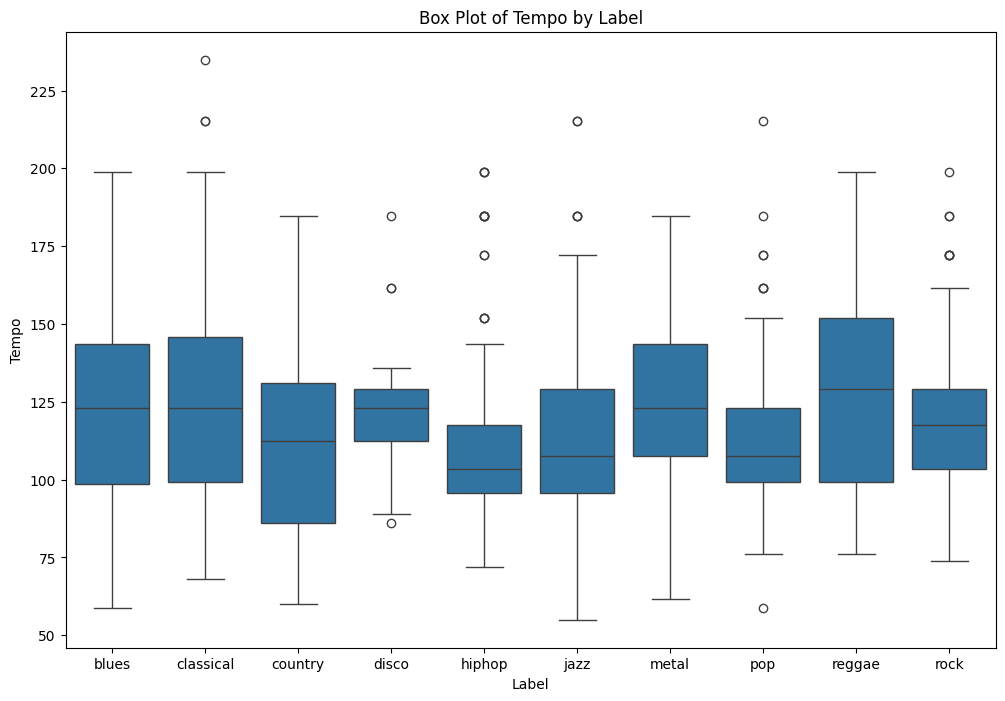

In [12]:
# boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='tempo', data=df1)
plt.title('Box Plot of Tempo by Label')
plt.xlabel('Label')
plt.ylabel('Tempo')
plt.show()

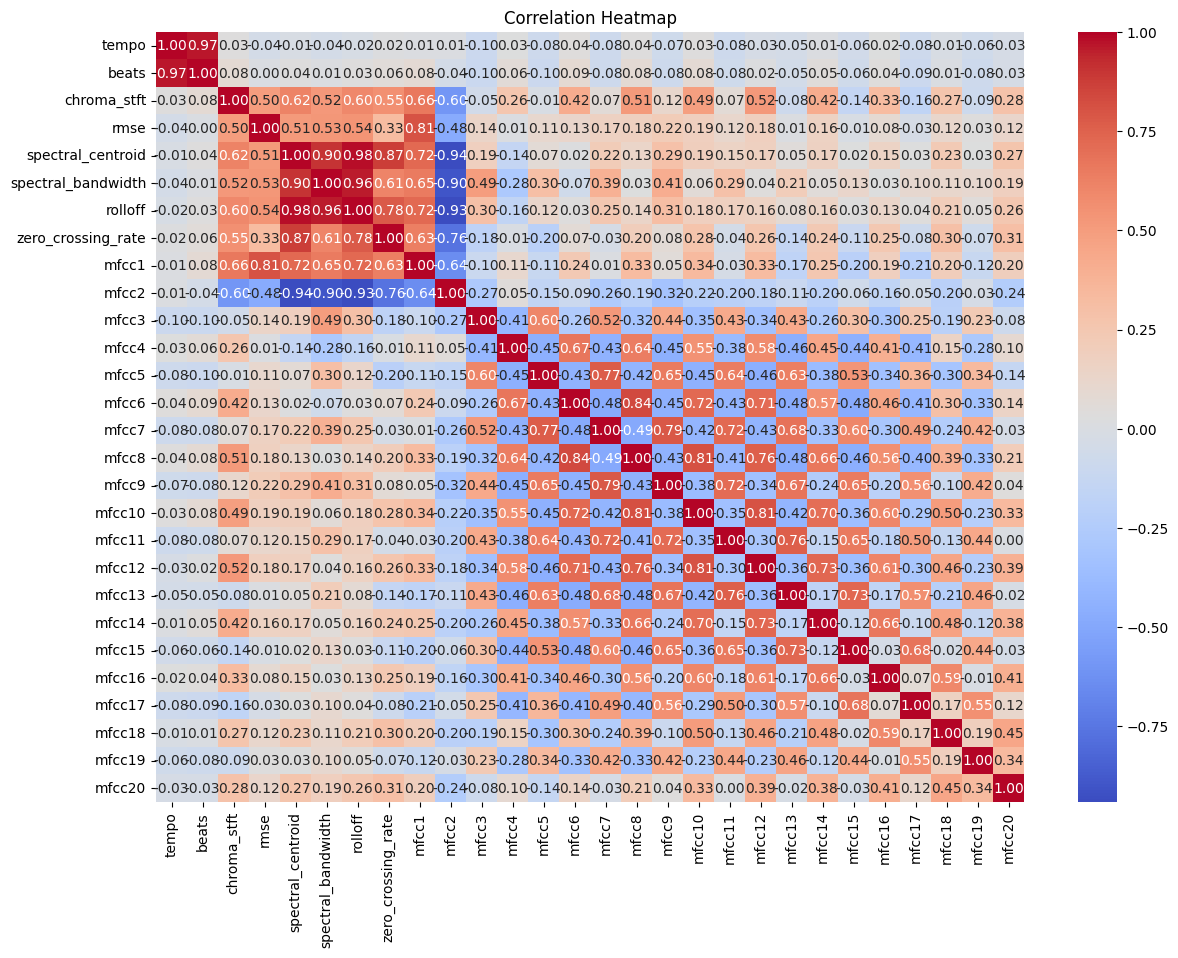

In [62]:
# Remove non-numeric columns (you'll need to replace 'non_numeric_column' with your actual column names)
df1 = df1.select_dtypes(include=[np.number])

# Now you can calculate the correlation matrix
correlation_matrix = df1.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 1.c. Inferential Analysis
To explore relationships between numerical features and the target variable, perform a t-test and MANOVA.

In [14]:
from scipy.stats import ttest_ind

# Assuming binary classification, replace 'Class1' and 'Class2' with actual class labels
class1_tempo = df1[df1['label'] == 'blues']['spectral_bandwidth']
class2_tempo = df1[df1['label'] == 'hiphop']['spectral_bandwidth']

t_stat, p_value = ttest_ind(class1_tempo, class2_tempo)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -12.147881559936243, p-value: 9.763810982907859e-26


The result indicates that there is strong evidence to suggest a significant difference in the mean 'spectral_bandwidth' between the 'blues' and 'hiphop' classes.

In [15]:
from statsmodels.multivariate.manova import MANOVA
manova_model = MANOVA.from_formula('tempo + beats + chroma_stft + rmse + spectral_centroid + spectral_bandwidth + rolloff + zero_crossing_rate ~ label', data=df1)
manova_model.mv_test().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Multivariate linear model
================================================================
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0688 8.0000 983.0000 1663.3489 0.0000
         Pillai's trace  0.9312 8.0000 983.0000 1663.3489 0.0000
 Hotelling-Lawley trace 13.5369 8.0000 983.0000 1663.3489 0.0000
    Roy's greatest root 13.5369 8.0000 983.0000 1663.3489 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         label          Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1153 72.0000 5986.9349  35.4466 0.0000
         Pillai's trace 1.5579 72.0000 7920.0000  26.6022 0.0000
 Hotelling-Lawley trace 3.2955 72.0000 4016.0670  44.9232 0.0000
    Roy's greatest root 2.0006  9.0000  990.0000 220.0630 0.0000
================================================================

"""

- The overall MANOVA test and individual tests for each dependent variable provide evidence that there are significant differences in the combination of these musical features across different genres represented by the 'label' variable.

- These results indicate that at least one of the dependent variables has a significant effect on the 'label', suggesting that the musical features collectively contribute to genre differences.

### Task1.c Predicative Analysis 
With tempo to zero_crossing_rate as features and label as the target variable, use svc as the classifier.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [17]:
# Select features and target variable
X = df1[['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']]
y = df1['label']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train a Support Vector Machine (SVM) classifier
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)

SVC()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred

array(['disco', 'pop', 'pop', 'metal', 'pop', 'metal', 'metal', 'jazz',
       'metal', 'blues', 'rock', 'jazz', 'metal', 'country', 'reggae',
       'reggae', 'blues', 'hiphop', 'pop', 'disco', 'blues', 'blues',
       'metal', 'country', 'rock', 'jazz', 'classical', 'country',
       'metal', 'rock', 'disco', 'classical', 'metal', 'metal', 'metal',
       'classical', 'disco', 'disco', 'blues', 'country', 'disco', 'jazz',
       'metal', 'disco', 'country', 'country', 'country', 'metal',
       'hiphop', 'blues', 'classical', 'hiphop', 'country', 'country',
       'disco', 'reggae', 'metal', 'jazz', 'pop', 'reggae', 'jazz',
       'blues', 'jazz', 'blues', 'metal', 'metal', 'metal', 'disco',
       'blues', 'classical', 'classical', 'metal', 'classical', 'pop',
       'country', 'classical', 'metal', 'blues', 'jazz', 'disco', 'rock',
       'blues', 'blues', 'disco', 'disco', 'country', 'blues', 'country',
       'pop', 'reggae', 'rock', 'hiphop', 'jazz', 'blues', 'country',
       '

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [23]:
# Display results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.46

Confusion Matrix:
[[ 5  1  2  2  0  5  3  0  2  0]
 [ 2 11  0  0  0  0  0  0  0  0]
 [ 7  1  8  3  0  2  0  2  1  3]
 [ 0  0  0 13  1  0  3  1  1  2]
 [ 0  0  1  0  7  0  4  1  2  0]
 [ 3  3  4  3  0  8  0  1  0  0]
 [ 0  0  0  3  1  0 19  0  1  1]
 [ 0  0  2  0  0  1  0 10  0  0]
 [ 3  1  1  1  4  1  1  2  8  1]
 [ 3  0  5  3  0  2  4  0  1  3]]

Classification Report:
              precision    recall  f1-score   support

       blues       0.22      0.25      0.23        20
   classical       0.65      0.85      0.73        13
     country       0.35      0.30      0.32        27
       disco       0.46      0.62      0.53        21
      hiphop       0.54      0.47      0.50        15
        jazz       0.42      0.36      0.39        22
       metal       0.56      0.76      0.64        25
         pop       0.59      0.77      0.67        13
      reggae       0.50      0.35      0.41        23
        rock       0.30      0.14      0.19        21

    accuracy   

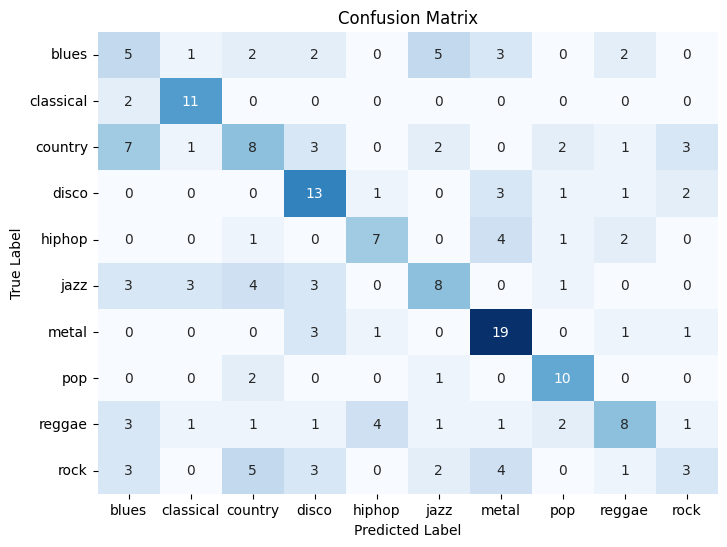

In [24]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### **Data Type**: Non-Linear, Multilabel
- **Possible Task**: Classification
- **Justification**:
- a. Domain Knowledge: Features like tempo, beats, and spectral properties are typically used in music genre classification.
- b. Exploratory Analysis: Visualizing spectral features across different genres to identify patterns.
- c. Inferential Analysis: Could involve examining how different audio features are associated with specific genres.
- d. Predictive Analysis: Using classification algorithms like neural networks or SVMs to classify music into genres based on audio features.
ures.

## Dataset2: Housing

In [25]:
df2 = pd.read_csv("Housing.csv")
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [26]:
df2.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### 2.a. Inspection of Variables
Dataset2 (`df2`) consists of both numerical and object variables:

- **Numerical Variables:**
  - `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`.

- **Categorical Variable:**
  - `mainroad`,`guestroom`, `basement`,`hotwaterheating`,`airconditioning`,`prefarea`,`furnishingstatus`

Based on the provided information, the dataset seems well-suited for a **regression task**. The target variable (price) is continuous, and the other variables (area, bedrooms, bathrooms, stories, parking) can serve as independent variables in predicting the house prices.

### 2.b. Exploratory Analysis

In [41]:
numeric_df = df2.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix_2 = numeric_df.corr()

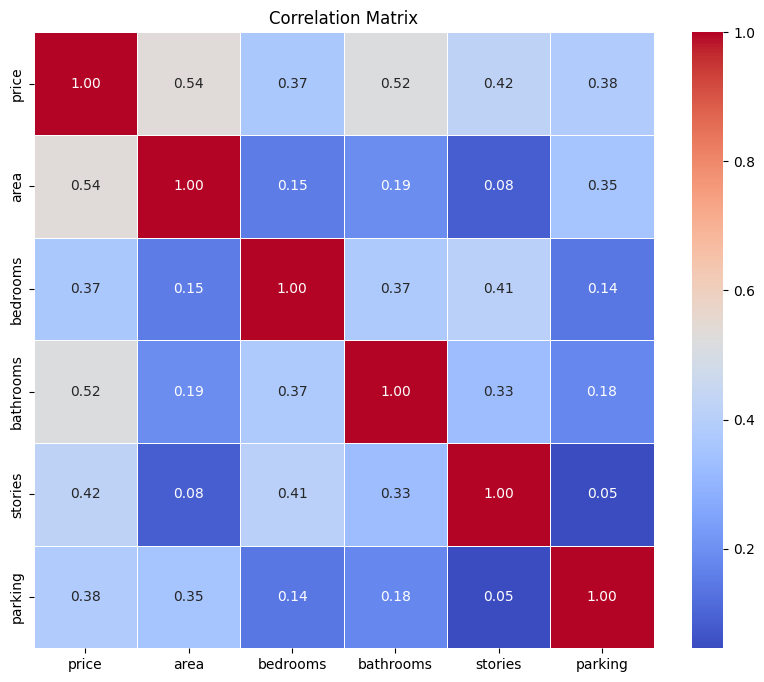

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [43]:
target_correlations = correlation_matrix_2['price'].sort_values(ascending=False)
target_correlations

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

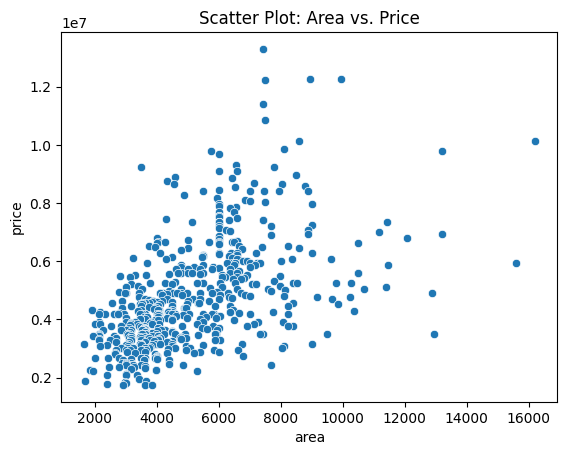

In [44]:
sns.scatterplot(x='area', y='price', data=df2)
plt.title('Scatter Plot: Area vs. Price')
plt.show()

### 2.c. Inferential Analysis
To explore relationships between numerical features and the target variable, perform a t-test.

In [45]:
houses_with_ac = df2[df2['airconditioning'] == 'yes']['price']
houses_without_ac = df2[df2['airconditioning'] == 'no']['price']

In [46]:
t_stat, p_value = ttest_ind(houses_with_ac, houses_without_ac)

In [47]:
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 11.839033782035843, p-value: 6.310969853530074e-29


With such a low p-value, we can conclude that there is a statistically significant difference in mean house prices between houses with and without air conditioning. The positive t-statistic indicates that houses with air conditioning tend to have higher mean prices compared to houses without air conditioning.

### 2.d. Predicative Analysis 

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [49]:
# Select features and target variable
X = df2[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df2['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Define numeric and categorical features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                         'airconditioning', 'prefarea', 'furnishingstatus']

In [52]:
# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Create a column transformer to apply transformers to the respective feature groups
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [53]:
# Create a pipeline with the preprocessor and the regressor (Random Forest in this case)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([5360180.        , 7287070.        , 3754878.75      ,
       4518220.        , 3748885.        , 3432660.        ,
       5070240.        , 5032580.        , 2572220.        ,
       2822893.5       , 9952209.4       , 3347465.        ,
       3023883.33333333, 3469340.        , 3561320.        ,
       3912510.        , 3305785.        , 4852645.        ,
       3669330.        , 4101405.        , 5433260.        ,
       5932920.        , 3067236.66666667, 3658130.        ,
       4722200.        , 6532505.        , 3083290.        ,
       4601170.        , 6330240.        , 3258150.        ,
       5765550.        , 3182340.        , 6748420.        ,
       4366460.        , 2947875.        , 6350050.        ,
       4867170.        , 3685920.        , 3106670.        ,
       4171650.        , 4146100.        , 2857015.        ,
       7453390.        , 4207210.        , 4011070.        ,
       4339300.        , 7316050.        , 4098360.        ,
       3011960.        ,

In [55]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1959323004717.2698


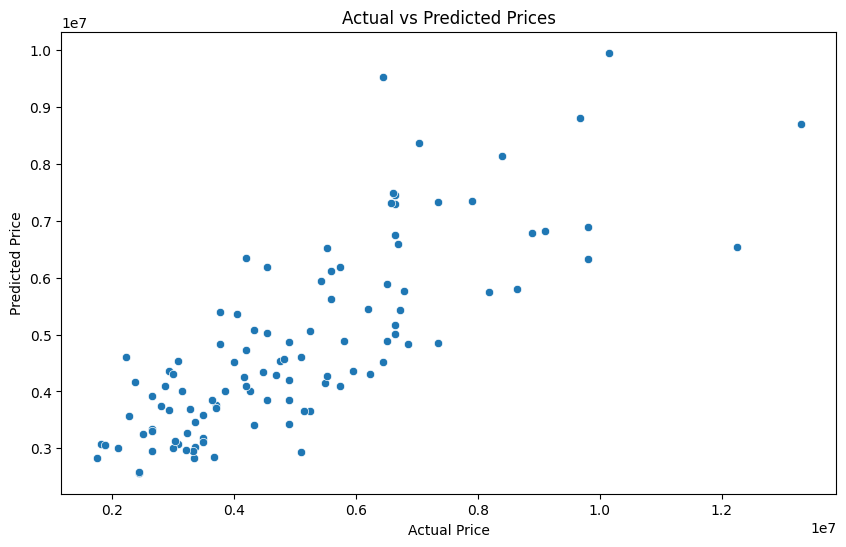

In [56]:
# Visualize predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

#### **Data Type**: NonLinear, Multilabel
- **Possible Task**: Classification

## Dataset3: wine

In [57]:
df3 = pd.read_csv("wine_data.csv")
df3

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [58]:
df3.dtypes

Unnamed: 0                        int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

### 3.a. Inspection of Variables

Given that all the variables are continuous, **regression tasks** would be the most appropriate. The goal would be to understand the relationships between the independent variables (attributes) and predict a continuous target variable.

### 3.b. Exploratory Analysis

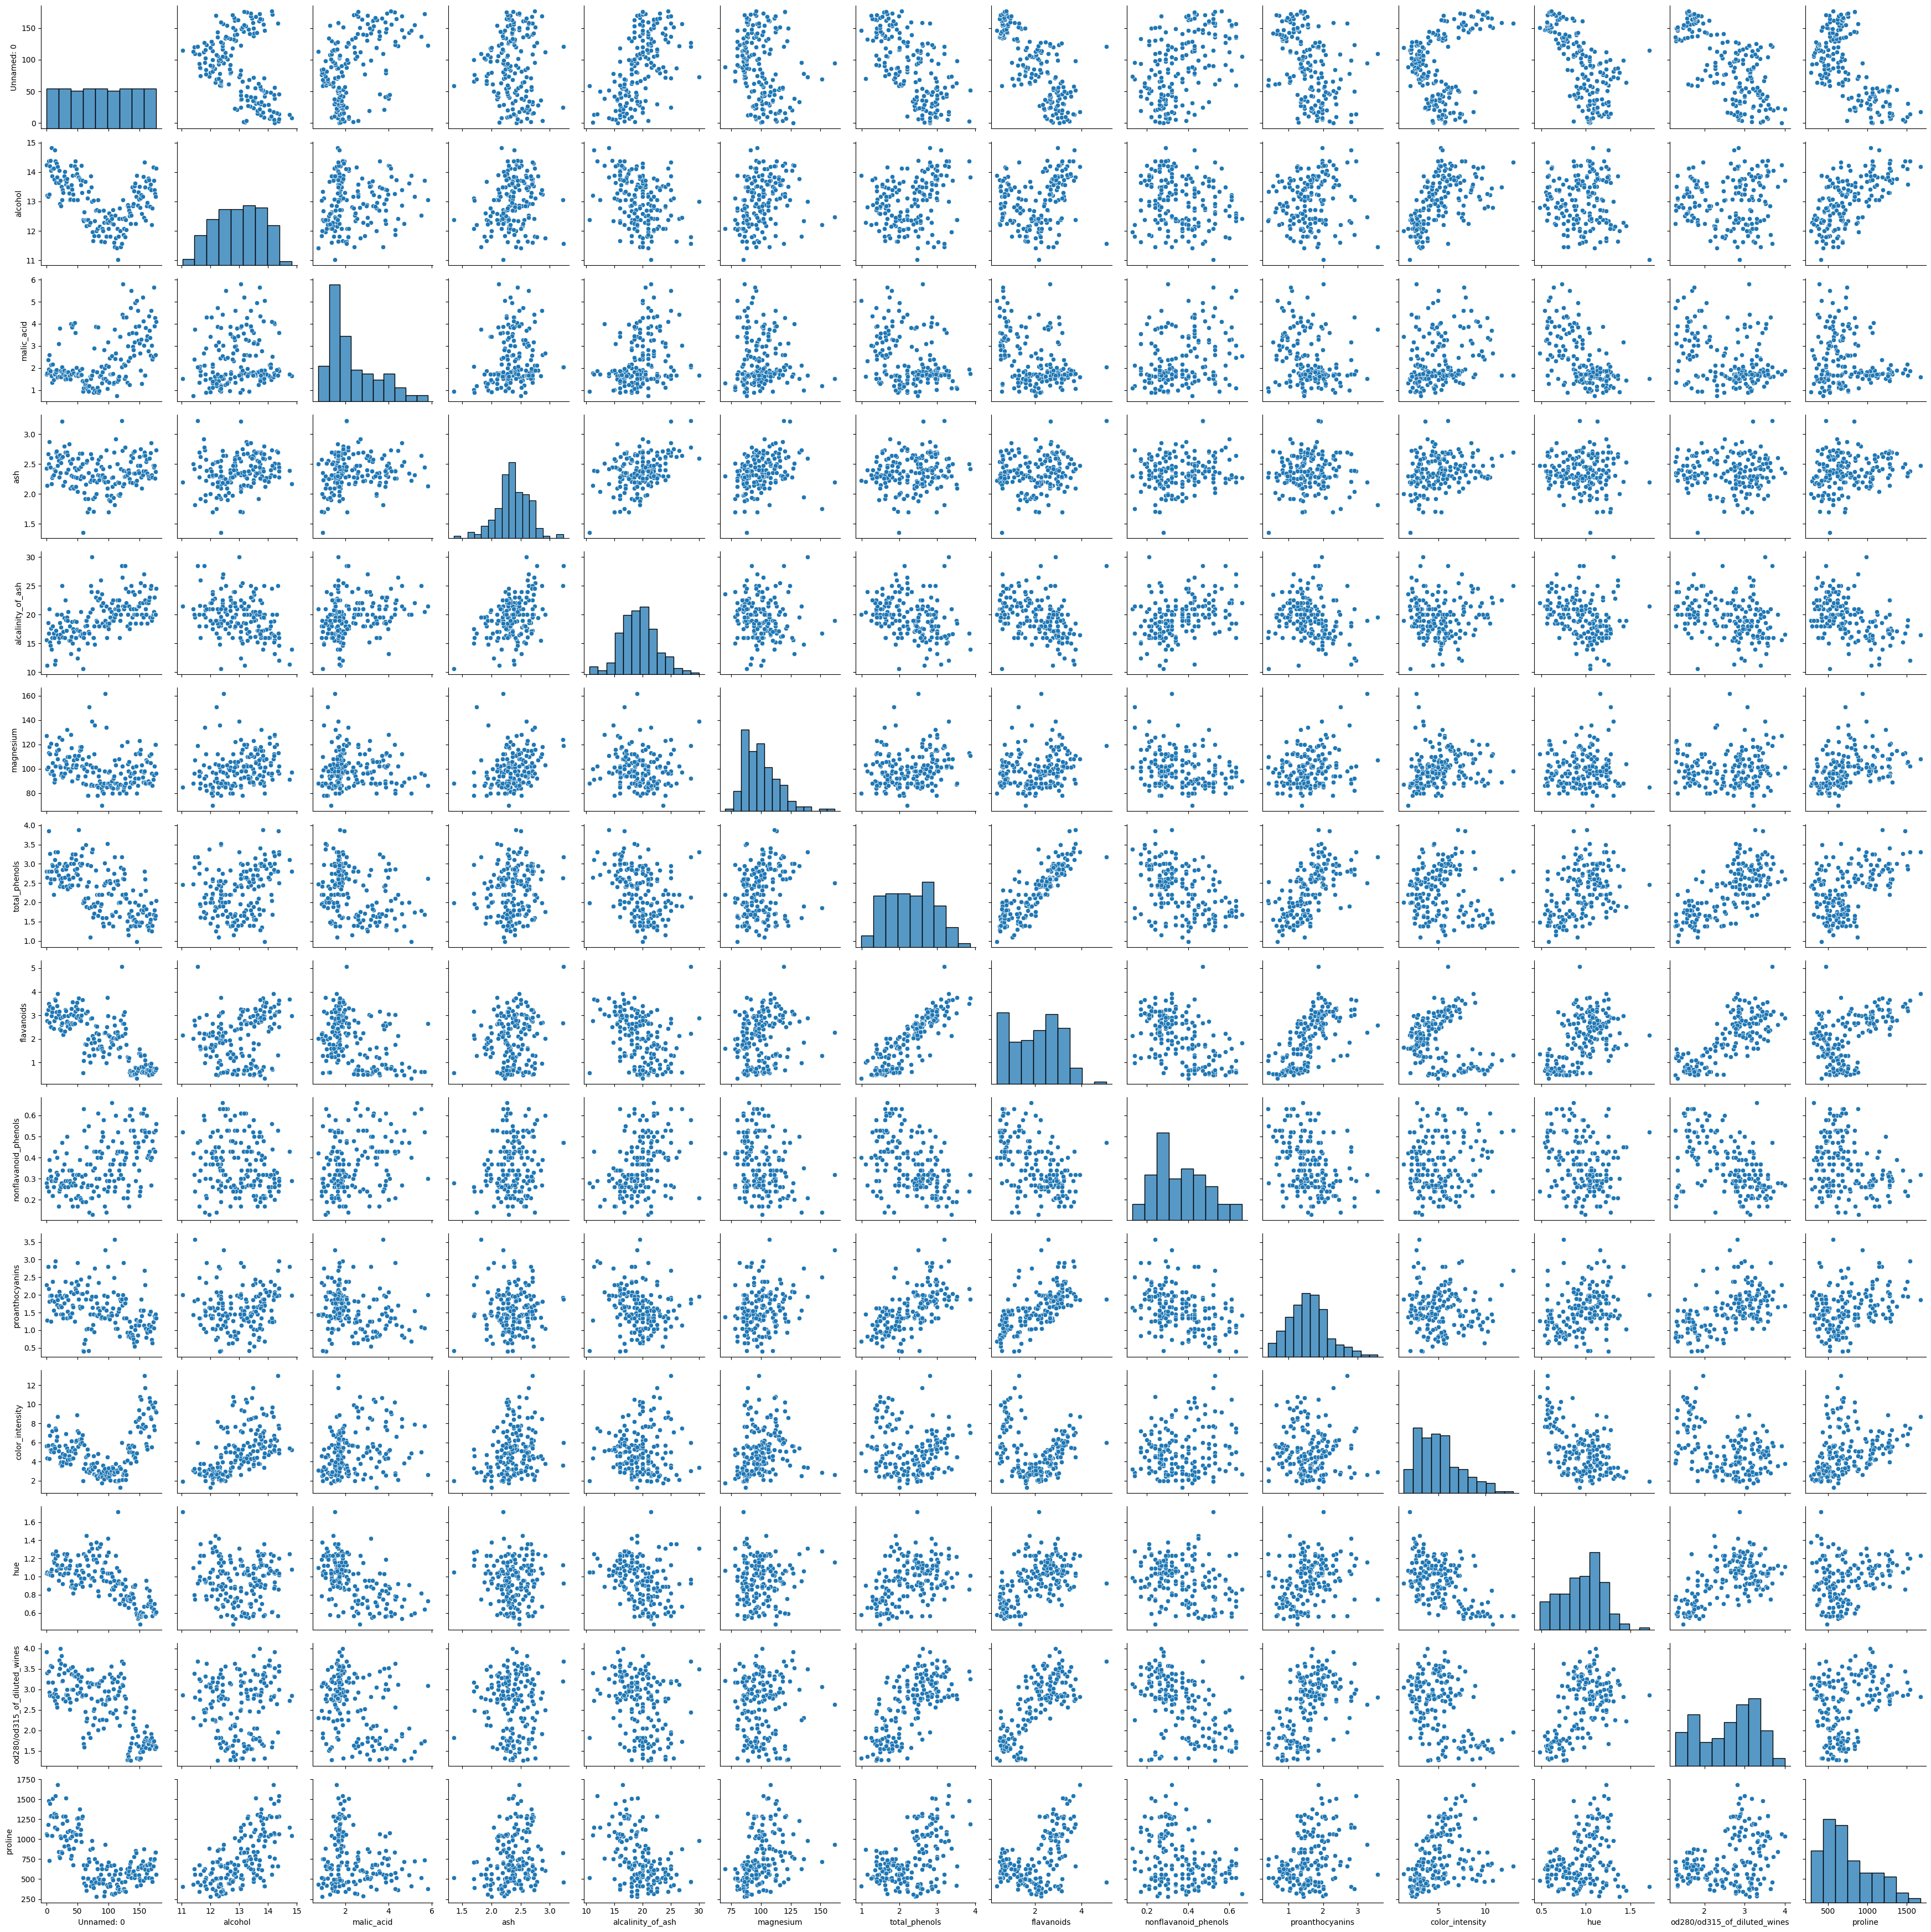

In [59]:
sns.pairplot(df3)
plt.tight_layout()
plt.show()

### 3.c. Inferential Analysis

In [60]:
import scipy.stats as stats

variable1 = df3['alcohol']
variable2 = df3['proline']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(variable1, variable2)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson Correlation Coefficient: 0.6437200371782135
P-value: 3.288368689992513e-22


There is a significant positive correlation between the 'alcohol' and 'proline' variables in your dataset.

#### **Data Type**: NonLinear, Multilabel
- **Possible Task**: Regression
- **Justification**:
- a. Domain Knowledge: Contains chemical properties of wine like alcohol, malic acid, which are often used to classify wine quality or type.
- b. Exploratory Analysis: Exploring relationships between chemical properties and wine type.
- c. Inferential Analysis: Analyzing how different chemical properties can infer the quality or type of wine.
- d. Predictive Analysis: Classification algorithms like decision trees or random forests to classify wine types.

## Dataset4 : MASTER_PhonesmartdataAll_CCI_AdvStats

In [61]:
# Load the dataset
phonesmart_csv = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Convert columns that should be numeric but are read as object due to empty strings or other non-numeric values
for col in phonesmart_csv.columns:
    if phonesmart_csv[col].dtype == 'object':
        phonesmart_csv[col] = pd.to_numeric(phonesmart_csv[col], errors='coerce')

# Inspecting Variables
variables_info_phonesmart = phonesmart_csv.dtypes

# Exploratory Analysis
basic_stats_phonesmart = phonesmart_csv.describe()
missing_values_phonesmart = phonesmart_csv.isnull().sum()

# Exclude non-numeric columns for correlation
numeric_cols_phonesmart = phonesmart_csv.select_dtypes(include=['float64', 'int64'])
correlations_phonesmart = numeric_cols_phonesmart.corr()

# Output
print("Variables Info:", variables_info_phonesmart)
print("Basic Statistics:", basic_stats_phonesmart)
print("Missing Values:", missing_values_phonesmart)
print("Correlations:", correlations_phonesmart)

Variables Info: Year                           int64
Age                          float64
GenderNum                    float64
AutismQuotient               float64
STAI                         float64
BRIEF_Total                  float64
Device                       float64
DailyAvgMins                 float64
DailyAvePickups              float64
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object
Basic Statistics:               Year         Age   GenderNum  AutismQuotient        STAI  \
count   548.000000  523.000000  538.000000      542.000000  539.000000   
mean   2020.711679   30.330784    1.791822        3.238007   47.421150   
std       0.731187    8.502397    0.433005        1.746556   11.564704   
min    2020.000000   16.000000    1.000000        0.000000   20.000000   
25%    2020.000000   25.000000    2.000000        2.000000   39.000000   
50%    2021.000000   29.000000    2.000000        3.000000   47.000000   
75%    2021.000000   34.000

#### **Data Type**: NonLinear, Multilabel
- **Possible Task**: Classification or Regression
- **Justification**:
- a. Domain Knowledge: The dataset includes variables like Autism Quotient, STAI, device usage, which might be used for behavioral analysis or health-related predictions.
- b. Exploratory Analysis: Analyzing patterns in device usage and how they relate to psychological metrics.
- c. Inferential Analysis: Could involve examining the relationship between device usage and psychological metrics.
- d. Predictive Analysis: Depending on the target variable, could use classification (e.g., predicting a categorical outcome like high vs. low stress) or regression (e.g., predicting a continuous outcome like Autism Quotient).